# Ánalise de Dados Hotmart

## 1. Introdução

Esse trabalho é parte de um desafio proposto pela empresa Hotmart.
 
Hotmart é uma empresa global de tecnologia e educação, com uma plataforma online para distribuição e venda de produtos digitais.  
 
A análise deste trabalho é baseada em uma amostra de compras feita na Hotmart no ano de 2016. Tratam-se de 1,5 milhão de registros de compras realizados na plataforma.

## 2. Dados

O primeiro passo em qualquer análise entender os dados. Vamos dar uma olhada no dataset disponibilizado. 

In [ ]:
# importando as bibliotecas que serão utilizados na análise
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings('ignore')

Os dados são disponibilizados pela Hotmart e se trata de uma amostra de compras feita pela Hotmart em 2016. Vamos começar carregando os dados e conferindo cada um deles e seu tipo.

In [ ]:
df = pd.read_csv('sales_table.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599829 entries, 0 to 1599828
Data columns (total 14 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   purchase_id                      1599829 non-null  int64  
 1   product_id                       1599828 non-null  float64
 2   affiliate_id                     1599828 non-null  float64
 3   producer_id                      1599828 non-null  float64
 4   buyer_id                         1599828 non-null  float64
 5   purchase_date                    1599828 non-null  object 
 6   product_creation_date            1599828 non-null  object 
 7   product_category                 1599828 non-null  object 
 8   product_niche                    1599828 non-null  object 
 9   purchase_value                   1599828 non-null  float64
 10  affiliate_commission_percentual  1599828 non-null  float64
 11  purchase_device                  1599828 non-null 

Podemos ver que o dataset tem 1599829 amostras e 14 colunas. De acordo com a Hotmart, cada campo significa:

● purchase_id: Identificação da compra na Hotmart;

● product_id: Identificação do produto na Hotmart;

● affiliate_id: Identificação do afiliado na Hotmart;

● producer_id: Identificação do produtor na Hotmart;

● buyer_id: Identificação do comprador na Hotmart;

● purchase_date: Data e hora em que a compra foi realizada;

● product_creation_date: Data e hora em que o produto foi criado na Hotmart;

● product_category: categoria do produto na Hotmart. Exemplo: e-book, software, curso online, e-tickets, etc.;

● product_niche: nicho de mercado que o produto faz parte. Exemplo: educação, saúde e bem-estar, sexualidade, etc.;

● purchase_value: valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a confidencialidade. O valor apresentado no dataset é o z-score do valor real;

● affiliate_commission_percentual: percentual de comissão que o afiliado receberá da compra;
● purchase_device: tipo de dispositivo utilizado no momento da compra, como: Desktop, Mobile, Tablet, ou Outros;

● purchase_origin: endereço do site do qual a pessoa veio antes da compra. Por exemplo, se uma pessoa veio do Facebook, Youtube, ou até mesmo de outra página no site oficial do produto;

● is_origin_page_social_network: informa se essa compra veio de uma URL do Facebook, Youtube, Instagram, Pinterest, ou Twitter.



## 3. Exploratory Data Analysis (EDA)

Vamos olhadar agora as primeiras 5 linhas do dataset:

In [ ]:
df.head()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1663958,6640.0,209372.0,116238.0,1200397.0,2016-06-26 09:00:00,2011-03-19 12:47:36,Video,Presentation skills,-0.265,50.0,Smart TV,Origin ef2b,"0,0"
2,1677087,2350.0,141418.0,2821.0,1083764.0,2016-06-26 09:00:00,2010-07-04 22:50:15,Podcast,Child psychology,-0.177,60.0,Smart TV,Origin ef2b,"0,0"
3,2017360,35669.0,618642.0,618642.0,1436106.0,2016-06-26 09:00:00,2012-06-12 23:59:37,Podcast,Presentation skills,-0.469,0.0,Smart TV,Origin ef2b,"0,0"
4,2017379,57998.0,1164511.0,70388.0,1436118.0,2016-06-26 09:00:00,2013-05-07 05:51:31,Podcast,Anxiety management,-0.401,50.0,Smart TV,Origin ef2b,"0,0"


Podemos ver que na primeira linha existem valores NaN, o que é um problema para as análises que serão feitas. Vamos então conferir quantas linhas do dataset existem esse com esse tipo de dados.

In [ ]:
# Conferindo quantos dados são null em cada coluna
df.isnull().sum()

purchase_id                        0
product_id                         1
affiliate_id                       1
producer_id                        1
buyer_id                           1
purchase_date                      1
product_creation_date              1
product_category                   1
product_niche                      1
purchase_value                     1
affiliate_commission_percentual    1
purchase_device                    1
purchase_origin                    1
is_origin_page_social_network      0
dtype: int64

Podemos ver que existe somente uma linha de dados com dados do tipo NaN, que como já vimos, trata-se da primeira linha do dados. Vamos então remove-los:

In [ ]:
df = df.dropna()
df.isnull().sum()

purchase_id                        0
product_id                         0
affiliate_id                       0
producer_id                        0
buyer_id                           0
purchase_date                      0
product_creation_date              0
product_category                   0
product_niche                      0
purchase_value                     0
affiliate_commission_percentual    0
purchase_device                    0
purchase_origin                    0
is_origin_page_social_network      0
dtype: int64

### 3.1 - Variáveis Contínuas

#### 3.1.2 - purchase_value

Agora podemos dar uma olhada geral nos dados numéricos. Da tabela abaixo vemos que a variável purchase_value tem valores negativos, o que não faz sentido para um valor de compra. No entanto, pela descrição, sabemos que ela foi codificada em termos de z score, que nada mais é do que o número de desvios padrões em relação a média de um ponto de informação.

In [ ]:
df.describe()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_value,affiliate_commission_percentual
count,1.599828e+06,1.599828e+06,1.599828e+06,1.599828e+06,1.599828e+06,1.599828e+06,1.599828e+06
mean,1.244546e+07,1.485958e+05,2.297501e+06,2.164480e+06,5.187551e+06,2.024780e-05,7.597402e+00
std,9.175820e+05,5.554317e+04,2.092656e+06,2.038960e+06,2.199257e+06,9.999806e-01,1.847787e+01
min,1.663958e+06,4.000000e+00,3.000000e+00,3.000000e+00,6.000000e+01,-5.410000e-01,0.000000e+00
25%,1.165374e+07,1.121380e+05,4.422410e+05,4.095900e+05,3.730213e+06,-4.530000e-01,0.000000e+00
50%,1.246849e+07,1.543100e+05,1.690428e+06,1.377289e+06,5.999154e+06,-3.500000e-01,0.000000e+00
75%,1.323310e+07,1.939340e+05,3.992235e+06,3.776238e+06,6.946337e+06,6.500000e-02,0.000000e+00
max,1.435720e+07,3.191290e+05,7.700836e+06,9.868481e+06,1.201479e+07,1.245610e+02,1.000000e+02


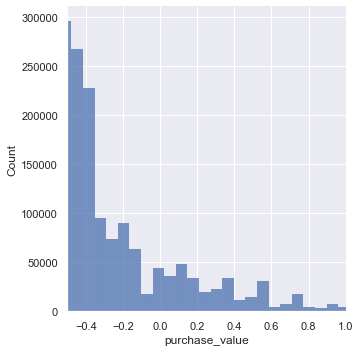

In [ ]:
ax = sns.displot(data=df, x='purchase_value', kind='hist', bins=2000)
ax.set(xlim=(-0.5, 1));

Olhando graficamente existe uma variação entre -0.5 e 1. Podemos utilizar a técnica de normalização MinMaxScaler e assim transformar o intervalo entre 0 e 1 e dessa forma teremos percentualmente o faturamento.

In [ ]:
min_max_scaler = MinMaxScaler()
df['purchase_value_%'] = min_max_scaler.fit_transform(df[['purchase_value']].values)

In [ ]:
df.head()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,purchase_value_%
1,1663958,6640.0,209372.0,116238.0,1200397.0,2016-06-26 09:00:00,2011-03-19 12:47:36,Video,Presentation skills,-0.265,50.0,Smart TV,Origin ef2b,"0,0",0.002206
2,1677087,2350.0,141418.0,2821.0,1083764.0,2016-06-26 09:00:00,2010-07-04 22:50:15,Podcast,Child psychology,-0.177,60.0,Smart TV,Origin ef2b,"0,0",0.002910
3,2017360,35669.0,618642.0,618642.0,1436106.0,2016-06-26 09:00:00,2012-06-12 23:59:37,Podcast,Presentation skills,-0.469,0.0,Smart TV,Origin ef2b,"0,0",0.000576
4,2017379,57998.0,1164511.0,70388.0,1436118.0,2016-06-26 09:00:00,2013-05-07 05:51:31,Podcast,Anxiety management,-0.401,50.0,Smart TV,Origin ef2b,"0,0",0.001119
5,2017382,58329.0,1261488.0,221253.0,1386357.0,2016-06-26 09:00:00,2013-05-12 05:12:06,Podcast,Teaching English,-0.452,50.0,Smart TV,Origin ef2b,"0,0",0.000711


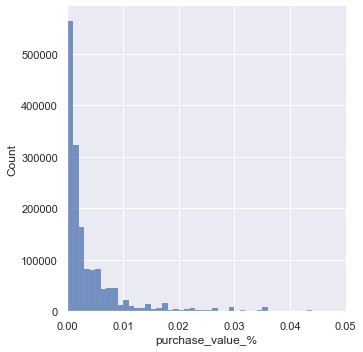

In [ ]:
ax = sns.displot(data=df, x='purchase_value_%', kind='hist', bins=1000)
ax.set(xlim=(0, 0.05));

### 3.2 - Variáveis Descretas

Nessa seção, iremos dar uma olhada nas variáveis discretas para procurar por tendências.

#### 3.2.1 - product_category

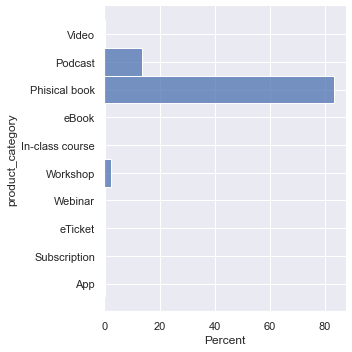

In [ ]:
sns.displot(data=df, y='product_category', stat='percent');

Analisando o gráfico de categoria de produtos, vemos que a maior concentração de vendas na plataforma Hotmart no ano de 2016 foi em livros físicos, representando quase 80% dos casos. Seguidos por Podcast perto dos 20% e Workshop quase todo o resto.

#### 3.2.2 - product_niche

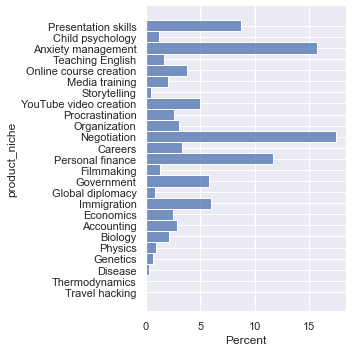

In [ ]:
sns.displot(data=df, y='product_niche', stat='percent');

Analisando o gráfico de nichos, vemos que as maiores concentrações de vendas na plataforma Hotmart no ano de 2016 estavam em na categoria de negociação, gerenciamento de ansiedade (autocontrole), que juntos representam quase 30% dos casos. Seguidos por finança pessoal e habilidade de apresentações que somados representam quase 20%.

#### 3.2.3 - purchase_device

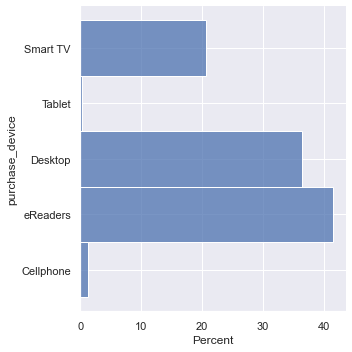

In [ ]:
sns.displot(data=df, y='purchase_device', stat='percent');

Analisando o gráfico de dispositivos onde são feitas as compras, vemos que a maior concentração de vendas na plataforma Hotmart no ano de 2016 foi em eReaders, representando 40% dos casos. Seguidos por Desktop na casa dos 35% e Smart TV com 20%.

#### 3.2.4 - is_origin_page_social_network

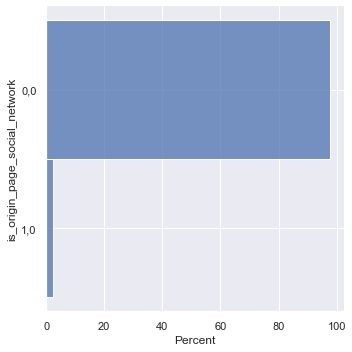

In [ ]:
sns.displot(data=df, y='is_origin_page_social_network', stat='percent');

Por último, o gráfico se a compra tem origem de rede sociais, vemos que quase a totalidade está com 0. Sobre esta categoria não ficou claro se 0 representa "Sim" ou "Não"

### 3.3 - Segmentação De Vendas Por Produto

Agora que conhecemos as variáveis discretas e contínuas, vamos analisar as vendas segmentadas por produto.

In [ ]:
# Produtos mais vendidos por id
num_sales = df.groupby('product_id').count()[['purchase_id']].sort_values(by=['purchase_id'], ascending=False)
num_sales.columns = ['num_sales']
num_sales['sales%'] = 100*(num_sales['num_sales']/num_sales['num_sales'].sum())
df_subset = df.filter(['product_id', 'product_category', 'product_niche', 'purchase_device', 'purchase_value_%']).drop_duplicates(subset=['product_id'])
df_subset = df_subset.merge(num_sales, how='inner',on='product_id')
df_subset['revenue'] = df_subset['purchase_value_%'] * df_subset['num_sales']
df_subset['product_id'] = df_subset['product_id'].astype('int')
df_subset['revenue%'] = 100*(df_subset['revenue']/df_subset['revenue'].sum())

df_subset1 = df_subset.sort_values(by='num_sales', ascending=False).head(10)
df_subset1

,product_id,product_category,product_niche,purchase_device,purchase_value_%,num_sales,sales%,revenue,revenue%
12916,219755,Phisical book,Immigration,Desktop,0.000016,41220,2.576527,0.658982,0.010883
222,130294,Phisical book,Immigration,eReaders,0.002830,32731,2.045907,92.618615,1.529521
40,42903,Phisical book,YouTube video creation,Smart TV,0.002310,27228,1.701933,62.899810,1.038739
315,63718,Phisical book,YouTube video creation,eReaders,0.001902,24132,1.508412,45.909866,0.758164
95,132809,Phisical book,Personal finance,Smart TV,0.000016,23350,1.459532,0.373295,0.006165
92,83377,Phisical book,Anxiety management,Smart TV,0.002982,21601,1.350208,64.404830,1.063594
429,149048,Phisical book,Negotiation,Smart TV,0.000144,16386,1.024235,2.357660,0.038935
184,59205,Phisical book,Negotiation,eReaders,0.002958,16096,1.006108,47.605314,0.786163
139,154310,Podcast,Government,Smart TV,0.000520,14455,0.903535,7.510471,0.124029
216,132454,Phisical book,Online course creation,eReaders,0.000272,11685,0.730391,3.175729,0.052445


Da tabela gerada, vemos que os produtos mais vendidos foram livros físicos, como era de se esperar, visto que representam quase 80% de vendas na plataforma, focado no nicho de imigração, criação de conteúdo por Youtubers, e finanças. A maioria das compras vieram de eReaders e Smart TV.

In [ ]:
# Produtos com maior faturamente por id
df_subset2 = df_subset.sort_values(by='revenue', ascending=False).head(10)
df_subset2

,product_id,product_category,product_niche,purchase_device,purchase_value_%,num_sales,sales%,revenue,revenue%
222,130294,Phisical book,Immigration,eReaders,0.002830,32731,2.045907,92.618615,1.529521
10213,206775,Phisical book,Careers,eReaders,0.061678,1226,0.076633,75.616825,1.248751
92,83377,Phisical book,Anxiety management,Smart TV,0.002982,21601,1.350208,64.404830,1.063594
40,42903,Phisical book,YouTube video creation,Smart TV,0.002310,27228,1.701933,62.899810,1.038739
220,138480,Phisical book,Presentation skills,Desktop,0.005955,9903,0.619004,58.973757,0.973904
377,191898,Phisical book,Anxiety management,eReaders,0.005380,10018,0.626192,53.892935,0.889998
10153,202509,Phisical book,Accounting,eReaders,0.021063,2376,0.148516,50.045243,0.826457
10799,209799,Phisical book,Negotiation,eReaders,0.030071,1622,0.101386,48.775911,0.805495
184,59205,Phisical book,Negotiation,eReaders,0.002958,16096,1.006108,47.605314,0.786163
358,150610,Phisical book,Child psychology,eReaders,0.007458,6253,0.390855,46.634338,0.770128


Na tabela acima é possível ver que no quesito de faturamento, o top 10 são todos livros físicos focados no mesmo nicho. O curioso é que as compras foram feitas na maior parte nos eReaders, o que fica o questionamento se a categoria de produtos está realmente correta.

In [ ]:
df_subset1.merge(df_subset2 , on='product_id')

,product_id,product_category_x,product_niche_x,purchase_device_x,purchase_value_%_x,num_sales_x,sales%_x,revenue_x,revenue%_x,product_category_y,product_niche_y,purchase_device_y,purchase_value_%_y,num_sales_y,sales%_y,revenue_y,revenue%_y
0,130294,Phisical book,Immigration,eReaders,0.002830,32731,2.045907,92.618615,1.529521,Phisical book,Immigration,eReaders,0.002830,32731,2.045907,92.618615,1.529521
1,42903,Phisical book,YouTube video creation,Smart TV,0.002310,27228,1.701933,62.899810,1.038739,Phisical book,YouTube video creation,Smart TV,0.002310,27228,1.701933,62.899810,1.038739
2,83377,Phisical book,Anxiety management,Smart TV,0.002982,21601,1.350208,64.404830,1.063594,Phisical book,Anxiety management,Smart TV,0.002982,21601,1.350208,64.404830,1.063594
3,59205,Phisical book,Negotiation,eReaders,0.002958,16096,1.006108,47.605314,0.786163,Phisical book,Negotiation,eReaders,0.002958,16096,1.006108,47.605314,0.786163


Por último, temos que 4 dos 10 produtos mais vendidos na plataforma também são os produtos que mais geraram receitas.
 
Agora vamos analisar a relevância de vendas dos produtos na Hotmart


In [ ]:
values = [1, 10, 50, 100, 500, 1000]
for value in values:
    x = df_subset['sales%'].sort_values(ascending=False).iloc[0:value].sum()
    print(f'top {value} Sales {x: .2f} %')
print()
for value in values:    
    y = df_subset['revenue%'].sort_values(ascending=False).iloc[0:value].sum()
    print(f'top {value} Revenue {y: .2f} %')

top 1 Sales  2.58 %
top 10 Sales  14.31 %
top 50 Sales  28.36 %
top 100 Sales  37.28 %
top 500 Sales  61.94 %
top 1000 Sales  73.54 %

top 1 Revenue  1.53 %
top 10 Revenue  9.93 %
top 50 Revenue  27.66 %
top 100 Revenue  38.51 %
top 500 Revenue  67.08 %
top 1000 Revenue  79.07 %


Dos resultados, podemos ver que os 10 produtos que mais deram lucros para a Hormat no ano de 2016 também foram responsáveis por quase 10% de todo o lucro da empresa. Vemos também que 50% dos produtos mais vendidos, são responsáveis por quase 30% de todo o faturamento. No quesito de quantidade de vendas, vemos que o padrão é muito parecido com a quantidade de lucro da empresa.

### 3.4 - Segmentação Das Vendas Por Produtor de Conteúdo

Iremos fazer a mesma análise de seção anterior, mas focado no produtor de conteúdo



In [ ]:
# Produtos mais vendidos por id
num_sales = df.groupby('producer_id').count()[['purchase_id']].sort_values(by=['purchase_id'], ascending=False)
num_sales.columns = ['num_sales']
num_sales['sales%'] = 100*(num_sales['num_sales']/num_sales['num_sales'].sum())
df_subset = df.filter(['producer_id', 'product_category', 'product_niche', 'purchase_device', 'purchase_value_%']).drop_duplicates(subset=['producer_id'])
df_subset = df_subset.merge(num_sales, how='inner',on='producer_id')
df_subset['revenue'] = df_subset['purchase_value_%'] * df_subset['num_sales']
df_subset['producer_id'] = df_subset['producer_id'].astype('int')
df_subset['revenue%'] = 100*(df_subset['revenue']/df_subset['revenue'].sum())


df_subset1 = df_subset.sort_values(by='num_sales', ascending=False).head(10)
df_subset1

,producer_id,product_category,product_niche,purchase_device,purchase_value_%,num_sales,sales%,revenue,revenue%
6067,6697083,Phisical book,Immigration,Desktop,0.000016,41220,2.576527,0.658982,0.010475
191,3992235,Phisical book,Immigration,eReaders,0.002830,39331,2.458452,111.294576,1.769177
91,464846,Phisical book,Personal finance,Smart TV,0.000016,35470,2.217113,0.567057,0.009014
56,349701,Phisical book,Anxiety management,Smart TV,0.003109,34568,2.160732,107.487906,1.708665
268,166090,Phisical book,YouTube video creation,eReaders,0.001902,28895,1.806132,54.971223,0.873842
37,442241,Phisical book,YouTube video creation,Smart TV,0.002310,27798,1.737562,64.216575,1.020809
88,2307584,Phisical book,Anxiety management,Smart TV,0.002982,21720,1.357646,64.759636,1.029442
60,3382787,Podcast,Anxiety management,Smart TV,0.000296,20199,1.262573,5.974029,0.094965
351,4580574,Phisical book,Negotiation,Smart TV,0.000144,16386,1.024235,2.357660,0.037478
160,671256,Phisical book,Negotiation,eReaders,0.002958,16096,1.006108,47.605314,0.756751


In [ ]:
# Produtores com maior faturamente por id
df_subset2 = df_subset.sort_values(by='revenue', ascending=False).head(10)
df_subset2

,producer_id,product_category,product_niche,purchase_device,purchase_value_%,num_sales,sales%,revenue,revenue%
1963,3781032,Phisical book,Personal finance,Desktop,0.171356,802,0.050130,137.427651,2.184598
81,4181,Phisical book,Careers,Smart TV,0.035467,3823,0.238963,135.590566,2.155395
191,3992235,Phisical book,Immigration,eReaders,0.002830,39331,2.458452,111.294576,1.769177
56,349701,Phisical book,Anxiety management,Smart TV,0.003109,34568,2.160732,107.487906,1.708665
48,304845,Phisical book,Accounting,Smart TV,0.035027,3024,0.189020,105.922911,1.683787
78,3630929,Phisical book,Negotiation,Smart TV,0.016275,5645,0.352850,91.870793,1.460410
80,1961779,Phisical book,Presentation skills,Smart TV,0.071478,1125,0.070320,80.412383,1.278263
5209,1305866,Phisical book,Negotiation,eReaders,0.030071,2533,0.158330,76.171012,1.210841
289,4466217,Phisical book,Personal finance,eReaders,0.041710,1821,0.113825,75.953846,1.207389
315,227543,Phisical book,Accounting,Desktop,0.017490,4002,0.250152,69.993893,1.112647


In [ ]:
df_subset1.merge(df_subset2 , on='producer_id')

,producer_id,product_category_x,product_niche_x,purchase_device_x,purchase_value_%_x,num_sales_x,sales%_x,revenue_x,revenue%_x,product_category_y,product_niche_y,purchase_device_y,purchase_value_%_y,num_sales_y,sales%_y,revenue_y,revenue%_y
0,3992235,Phisical book,Immigration,eReaders,0.002830,39331,2.458452,111.294576,1.769177,Phisical book,Immigration,eReaders,0.002830,39331,2.458452,111.294576,1.769177
1,349701,Phisical book,Anxiety management,Smart TV,0.003109,34568,2.160732,107.487906,1.708665,Phisical book,Anxiety management,Smart TV,0.003109,34568,2.160732,107.487906,1.708665


Temos que 2 dos 10 produtores que mais vebdem na plataforma também são os produtos que mais geraram receitas. 

Agora vamos analisar a relevância de vendas dos produtores de conteúdo na Hotmart

In [ ]:
values = [1, 10, 50, 100, 500, 1000]
for value in values:
    x = df_subset['sales%'].sort_values(ascending=False).iloc[0:value].sum()
    print(f'top {value} Sales {x: .2f} %')
print()
for value in values:    
    y = df_subset['revenue%'].sort_values(ascending=False).iloc[0:value].sum()
    print(f'top {value} Revenue {y: .2f} %')

top 1 Sales  2.58 %
top 10 Sales  17.61 %
top 50 Sales  36.58 %
top 100 Sales  48.55 %
top 500 Sales  79.79 %
top 1000 Sales  89.94 %

top 1 Revenue  2.18 %
top 10 Revenue  15.77 %
top 50 Revenue  42.69 %
top 100 Revenue  57.56 %
top 500 Revenue  87.11 %
top 1000 Revenue  94.43 %


Dos resultados, podemos ver que os 10 dos produtores de conteúdo que mais deram lucros para a Hormat no ano de 2016 foram responsáveis por quase 15% de todo o lucro da empresa. Vemos também que 100 dos produtores de conteúdo que mais deram lucros, são responsáveis por quase 50% de todo o faturamento daquele ano. No quesito de quantidade de vendas, vemos que o padrão é muito parecido com a quantidade de lucro da empresa.
 
Podemos concluir que o Hotmart depende dos maiores produtores da plataforma.



## 4. Análise de Séries Temporais

Uma série temporal é uma sequência de pontos de dados obtidos em pontos sucessivos e igualmente espaçados no tempo que podem ser usados para prever o futuro. Um modelo de análise de séries temporais envolve o uso de dados históricos para prever o futuro. Ele procura no conjunto de dados recursos como tendências, flutuações cíclicas, sazonalidade e padrões comportamentais.
 
As três principais ideias gerais que são fundamentais a serem consideradas, ao lidar com um problema de previsão de vendas abordado a partir de uma perspectiva de série temporal, são:
 
 * Padrões de repetição
 * Padrões estáticos
 * Tendências

### Há épocas do ano em que uma determinada categoria ou nicho de produto vende mais?

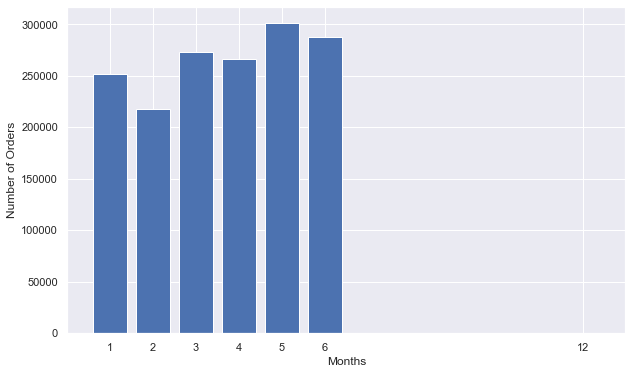

In [ ]:
df['month'] = pd.to_datetime(df['purchase_date']).dt.month
results1 = df.groupby(['month'])['product_id'].count()
months = [month for month, df in df.groupby('month')]

fig = plt.figure(figsize=(10,6))
plt.bar(months, results1)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Number of Orders');

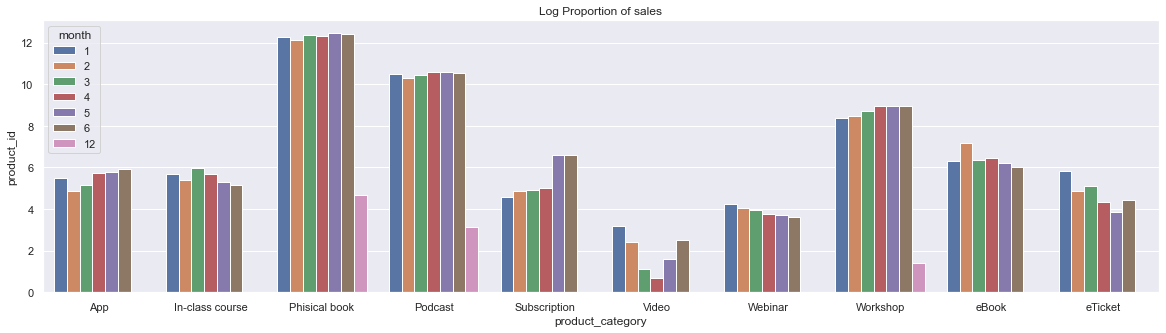

In [ ]:
meses = df.groupby(['product_category', 'month'])[['product_id']].count()
y = np.log(meses.reset_index()['product_id'])
hue = meses.reset_index()['month']
x = meses.reset_index()['product_category']

fig = plt.figure(figsize=(20,5))
g=sns.barplot(x=x, y=y,hue=hue, data=meses).set_title("Log Proportion of sales")

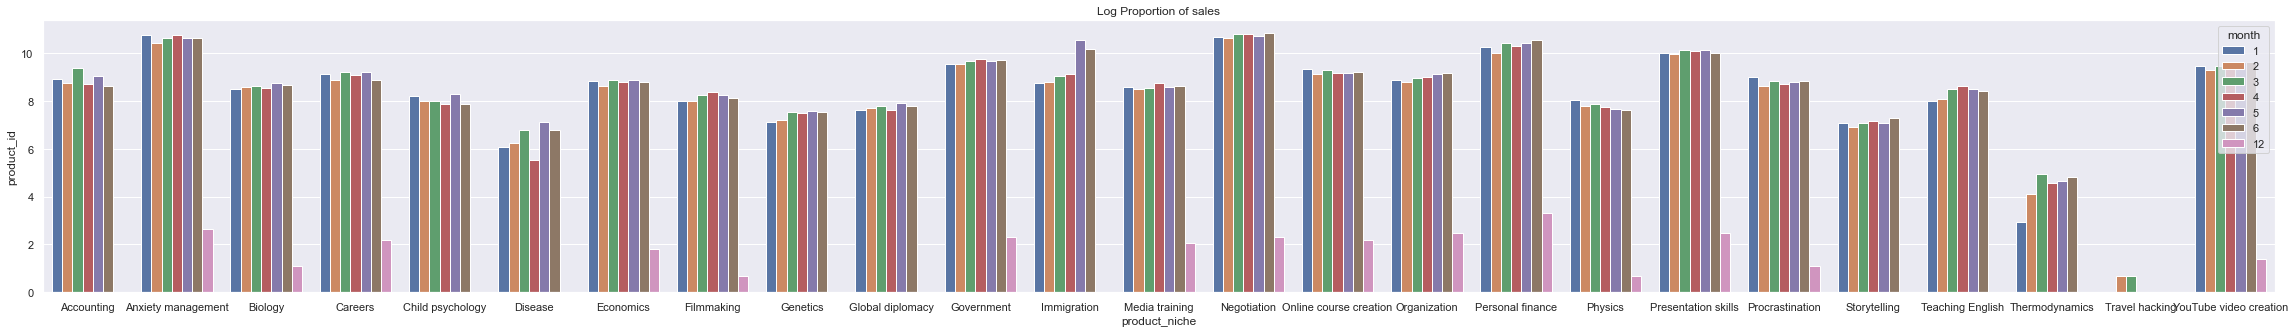

In [ ]:
meses = df.groupby(['product_niche', 'month'])[['product_id']].count()
y = np.log(meses.reset_index()['product_id'])
hue = meses.reset_index()['month']
x = meses.reset_index()['product_niche']

fig = plt.figure(figsize=(40,5))
g=sns.barplot(x=x, y=y,hue=hue, data=meses).set_title("Log Proportion of sales")

### A que horas devemos exibir anúncios para maximizar a probabilidade de compra do produto pelo cliente?

In [ ]:
df['hour'] = pd.to_datetime(df['purchase_date']).dt.hour

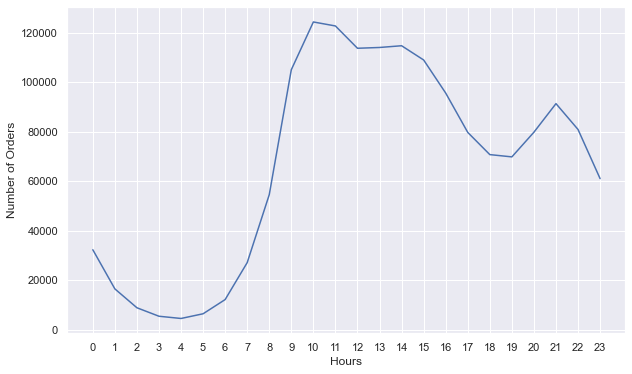

In [ ]:
results = df.groupby(['hour'])['product_id'].count()
hours = [hour for hour, df in df.groupby('hour')]

fig = plt.figure(figsize=(10,6))
sns.lineplot(hours, results)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders');

Como você pode ver na Figura, existem aproximadamente 2 picos nos dados. São das 10h às 11h e um menor às 21h . Faz sentido, já que a maioria das pessoas faz compras durante o dia. A partir desses dados, podemos sugerir ao nosso parceiro comercial que anuncie seu produto antes das 12h e/ou 19h. Pode ser 9h30 e/ou 20h30.

### Análise de Predições

#### Padrões de Repetição
 
Vamos começar analisando a série temporal por quantidade de vendas e lucros e procurar se existem padrões de repetição.

In [1]:
df['date'] = pd.to_datetime(df['purchase_date']).dt.date
df_sales_sum = df.groupby(by=['date'], as_index=False)['date'].value_counts()
df_sales_sum.sort_values(by='count', ascending=False).head(10)

NameError: ignored

In [ ]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
df_sales_sum.plot(x="date",y="count",color="g",ax=ax1, fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.title("Total Sales Volume", fontsize=15)
plt.ylabel("Sales", fontsize=15)


ax2 = fig.add_subplot(122)
plot_acf(df_sales_sum['count'],ax=ax2)
plt.title("Autocorrelation", fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()

Da tabela e do gráfico podemos ver que o dia que mais teve movimentação foi no dia 2 de maio com quase o dobro das próximas datas do top 10. Olhando somente os dados fornecidos não há muito de especial para explicar esse fato. Olhando o top 10 de maiores transações na plataforma, notamos que outras datas em maio também tiveram grande volume de vendas.
 
Analisando o gráfico de autocorrelação, vemos alguns pontos de correlação relativamente alta em lag 2 e 7. A falta de uma estrutura bem definida é resultado das contingências de vendas: dado o número de fatos que entram na previsão de vendas, não devemos esperar que os dados tenham correlações perfeitamente claras como em um conjunto de dados meteorológicos, por exemplo. No entanto, é interessante observar picos de correlação que podem estar associados a fatores relacionados ao tipo de produto envolvido.


In [ ]:
df_revenue_sum = df.groupby(by=['date'], as_index=False)['purchase_value_%'].sum()
df_revenue_sum.sort_values(by='purchase_value_%', ascending=False).head(10)

In [ ]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)

df_revenue_sum.plot(x="date",y="purchase_value_%",color="g",ax=ax1, fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.title("Total revenue Volume", fontsize=15)
plt.ylabel("Revenue", fontsize=15)


ax2 = fig.add_subplot(122)
plot_acf(df_revenue_sum['purchase_value_%'],ax=ax2)
plt.title("Autocorrelation", fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()

Já em relação ao lucro, podemos ver da tabela e gráfico que os maiores lucros ocorreram no mês de março e junho. Podemos ver também que o gráfico de autocorrelação tem um padrão muito parecido com o de quantidade de vendas.

In [ ]:
from statsmodels.tsa.stattools import adfuller 

adf_test_sales = adfuller(list(df_sales_sum["count"])) 

adf_test_revenue = adfuller(list(df_revenue_sum["purchase_value_%"])) 

print("Resultados de vendas:") 
print("ADF = " + str(adf_test_sales[0 ])) 
print("p-value = " +str(adf_test_sales[1]))

print("Resultados de Lucros:") 
print(" ADF = " + str(adf_test_revenue[0])) 
print("p-value = " +str(adf_test_revenue[1])) 

Podemos ver dos testes que o valor p indica uma confiança não significativa de que os dados seriam estacionários

#### Média móvel

Este modelo assume que a próxima observação é a média de todas as observações anteriores e pode ser usado para identificar tendências interessantes nos dados. Podemos definir uma janela para aplicar o modelo de média móvel para suavizar a série temporal e destacar diferentes tendências.

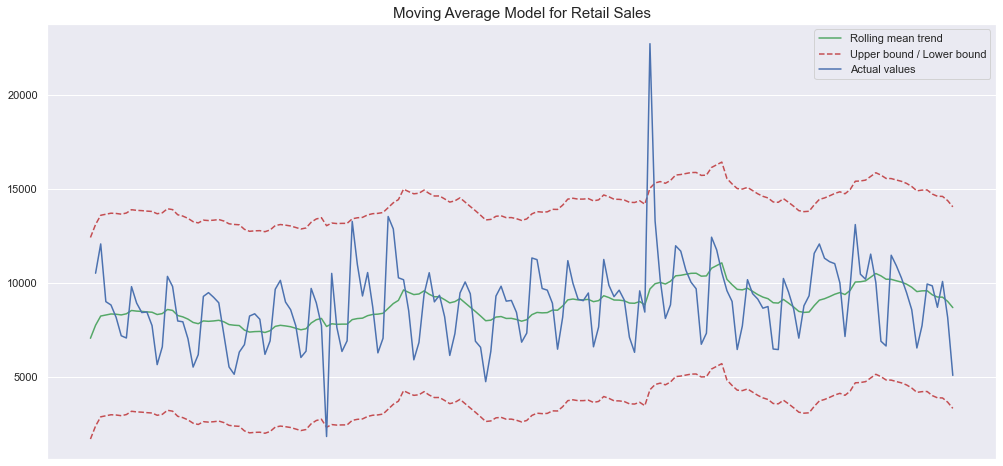

In [ ]:
from sklearn.metrics import mean_absolute_error

green = sns.color_palette("deep", 8)[2]
blue = sns.color_palette("deep", 8)[0]

series = df_sales_sum['count']
window=15

rolling_mean = series.rolling(window=window).mean()
fig,ax = plt.subplots(figsize=(17,8))


plt.title('Moving Average Model for Retail Sales',fontsize=15)

plt.plot(rolling_mean, color=green, label='Rolling mean trend')

#Plot confidence intervals for smoothed values
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + 1.92 * deviation)
upper_bound = rolling_mean + (mae + 1.92 * deviation)

plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
plt.plot(lower_bound, 'r--')

plt.plot(series[window:], color=blue,label='Actual values')


plt.legend(loc='best')
plt.grid(True)
plt.xticks([])
plt.show()

Para o conjunto de dados de vendas, o ajuste não parece tão promissor. Além disso, o parâmetro de janela que define o tamanho de nossa média tem um grande efeito em nosso desempenho geral e não foi feito nenhum ajuste de hiperparâmetro adicional. Aqui, o que devemos levar em consideração é que conjuntos de dados de vendas complexos exigirão mais informações do que uma simples série temporal unidimensional pode fornecer.

 #### Arima
ARIMA ou Auto-regressive Integrated Moving Average é um modelo de séries temporais que visa descrever as autocorrelações nos dados de séries temporais. Funciona bem para previsões de curto prazo e pode ser útil para fornecer valores previstos para períodos especificados pelo usuário, mostrando bons resultados para demanda, vendas, planejamento e produção.

Os parâmetros do modelo ARIMA são definidos da seguinte forma:

* p: O número de observações de atraso incluídas no modelo
* d: O número de vezes que as observações brutas são diferenciadas
* q: O tamanho da janela de média móvel

MSE error: 7473419.795985948


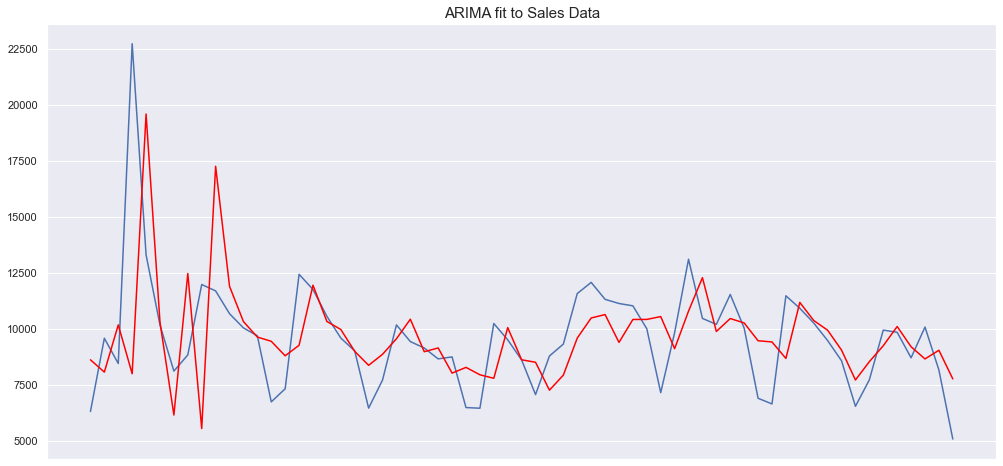

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



X = df_sales_sum['count'].values

split = int(0.66*len(X))
train, test = X[0:split], X[split:]

history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
    
	obs = test[t]
	history.append(obs)
mse = mean_squared_error(test, predictions)

print(f"MSE error: {mse}")

plt.figure(figsize=(17,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("ARIMA fit to Sales Data",fontsize=15)
plt.xticks([])
plt.show()

Podemos ver que tivemos um resultado muito ruim com o MSE bem alto.
Vamos apenas lembrar que os resultados aqui são apenas para mostrar os modelos e não representam uma estimativa precisa. Os conjuntos de dados são limitados (o conjunto de dados de vendas após a soma é menor que 200 pontos de dados) e não foi realizado nenhum ajuste de hiperparâmetro complexo. O objetivo aqui foi apenas demonstrar como esses modelos funcionam e como eles podem ser implementados. Podemos verificar que o conjunto de dados de vendas parece apresentar desafios que os modelos tradicionais não conseguem superar.

Podemos ver que, para conjuntos de dados que possuem um padrão claro, os modelos tradicionais funcionam bem. No entanto, na ausência de tal estrutura, esses modelos não parecem apresentar flexibilidade para se adaptar, pois dependem de fortes suposições sobre a dinâmica da série temporal alvo.